<h1> Desafio de analise de dados </h1>

Aqui temos nosso primeiro desafio de analise de dados baseado no mundo real. Tambem existe um gabarito com uma sugestao de resolucao.<br>
Como uma sugestao de roteiro, e interessante que estruturemos nosso notebook nas seguinte etapas:
1. Planejamento
2. Acesso aos dados
3. Integridade/consistencia
4. Analise
5. Apresentacao
<br><br>

O notebook tambem sugere algumas outras boas praticas de marcacao e documentacao ao longo da resolucao.<br>
Use quantas celulas voce precisar, o importante e ter um resultado limpo e de facil entendimento por todos.

---

<h2> Informacoes sobre o exercicio </h2>

Nosso time de auditoria recentemente recebeu uma demanda de analise de folha de pagamento sobre a empresa X. Nosso objetivo aqui e entender se a folha de pagamento da companhia esta de acordo e faz sentido com o que se propoe.<br>
1. Nosso time de TI, nos informou que todos os arquivos que recebemos estao na pasta '.../Data' mas que eles nao foram validados;
2. Existem 3 tabelas (departamento, funcionarios e folha), que consistem todo o universo de dados que possuimos para essa analise;
3. Entendemos que seria muito interessante entender outras metricas relacionadas aos dados que temos, conseguimos trazer algum insight?
4. Nosso time de TI, tambem nos informou que e esperado que o nosso resultado seja salvo na pasta '.../Resultados';
5. A analise nesse notebook precisa ficar limpa e concisa para que qualquer um no futuro possa entender o que foi feito;

<h3> Quais suspeitas temos levantadas? </h3>

Essa auditoria foi encomendada pelas seguintes suspeitas:
* Existem funcionarios recebendo pagamentos dobrados (no mesmo mes, sendo pagos duas vezes);
* Existem funcionarios que nao estao sendo pagos devidamente (pulando meses de pagamento);
* Existem funcionarios sem valor registrado no pagamento;
* Nao se sabe se as contas de salario bruto e salario liquido batem;

<h3> Sugestoes de insights</h3>

Insights interessantes que podemos encontrar:
* Funcionarios que ganham muito acima ou abaixo da media;
* Departamentos com salarios medios muito acima ou abaixo da media;
* O gasto mensal da empresa com folha de pagamento;
* Media de salario por cargo;
* Existe algum departamento sem funcionarios? 

---

<h2> Planejamento da analise </h2>

__Para realizarmos essa analise precisamos nos certificar que as tabelas existem e podem ser consumidas:__<br>
-> Va ate a pasta Data e verifique se os arquivos que estao la, podem ser usados e estao em formatos que voce conhece.<br>

__E importante verificar se a tabela resultados existe:__<br>
-> Veja se voce ja tem uma pasta chamada Resultados, se nao, crie uma.<br>

__Tambem e importante logar quando, por quem e onde esse trabalho esta sendo realizado:__<br>
-> Nao esqueca de documentar essas informacoes no notebook, elas vao ser muito importante para o futuro.<br>

__Defina o objetivo final da sua analise de forma clara e concisa:__<br>
-> O que voce quer resolver? Nao deixe de escrever e documentar nesse notebook

<h3> (Sugestao) Cabecalho da analise </h3>

Notebook desenvolvido com o intuito de resolver o problema de auditoria de folha de pagamento.<br>
O objetivo dessa analise e, __entender se a folha de pagamento da companhia X nao possui brechas aparentes__.|

Para preservar a reprodutibilidade dessa analise:
* Todos os dados aqui apresentados estao na pasta ".../Data";
* Todos os resultados aqui apresentados sao salvos na pasta ".../Resultados";
* Qualquer numero aleatorio vai ser feito com a semente valendo 42;

Essa analise foi feita utilizando as seguintes configuracoes:
* Anaconda com Python;
* Jupyter lab no navegador Chrome;
* Computador usado;
    * RAM: 32GB DDR4;
    * Processador: Ryzen 9 5900HS;
    * Video: Geforce RTX3060;
    * HD/SSD: 1TB Nvme
    * SO: Windows 11

As bibliotecas que vamos usar sao

In [74]:
import pandas as pd # Utilizado para importar tabelas
import numpy as np # Utilizado para trabalhar com numeros muito grandes
import matplotlib.pyplot as plt # Utilizado para criar graficos (novidade!)

---

<h2> Acesso aos dados relevantes </h2>

<h4> Importando arquivos </h4>

In [75]:
departamento = pd.read_csv("Data/Departamento.txt", header = None, names = ['ID', 'Depto'])

folha = pd.read_excel("Data/Folha.xls")

funcionarios = pd.read_excel("Data/Funcionarios.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


<h4> Verificando arquivos </h4>

In [76]:
departamento.head(5)

,ID,Depto
0,A00,Head Office
1,B01,Purchasing
2,C01,Marketing
3,D11,Design
4,D21,Finance & Accounting


In [77]:
folha.head(5)

,Matricula,Salario_Bruto,Desconto,Salario_Liquido,Cod_Dep,Data_Pag,Numero_Cheque
0,10,4395.83,879.17,3516.66,A00,2010-08-02,12346
1,20,3437.50,687.50,2750.00,B01,2010-08-03,12347
2,30,3187.50,637.50,2550.00,C01,2010-08-04,12348
3,50,3347.92,669.58,2678.34,E01,2010-08-05,12349
4,60,2687.50,537.50,2150.00,D11,2010-08-06,12350


In [78]:
funcionarios.head(5)

,MATRICULA,NOME,SOBRENOME,ENDERECO,CIDADE,ESTADO,PAIS,CODIGO_PAIS,CODIGO_DEPARTAMENTO,RAMAL,DATA_ADMISSAO,CARGO,NIVEL_FORMACAO,SEXO,DATA_NASCIMENTO,SALARIO_ANUAL,BONUS,COMISSAO,ULTIMO_PAGAMENTO
0,10,CARMEN,BACARDI BOLIVAR,"AV. CENTRAL, CALLES 5 Y 6",ALAJUELA,NaN,NaN,CR,A00,3978,1983-12-28,PRES,18,F,1952-08-09,52750,1000,4220,4395.83
1,20,POILIN,BREATNACH,HITDORFER STRASSE 12,ESSEN,NaN,NaN,DE,B01,3476,1992-10-05,MANAGER,18,M,1967-01-28,41250,800,3300,3637.50
2,30,GREGORY,QUINLAN,298 MAIN STREET,INDIANAPOLIS,IN,UNITED STATES,US,C01,4738,1994-03-31,MANAGER,20,F,1960-05-06,38250,800,3060,3187.50
3,50,MARKUS,BOCKELKAMP,AACHENER STRASSE 1053-1055,LANGENFELD,NaN,NaN,DE,E01,6789,1968-08-12,MANAGER,16,M,1944-09-10,40175,800,3214,3347.92
4,60,SAVI,MADAN,GROUND FLOOR,"COBHAM, SURREY",ENGLAND,GREAT BRITAIN,GB,D11,6423,1992-09-09,MANAGER,16,M,1964-07-02,32250,600,2580,2687.50


---

<h2> Verificacao de integridade e consistencia

<h2> Integridade dos dados </h2>

<h4> Procurando nulos </h4>

In [79]:
funcionarios.isnull().sum()

MATRICULA               0
NOME                    1
SOBRENOME               0
ENDERECO                0
CIDADE                  0
ESTADO                 16
PAIS                   20
CODIGO_PAIS             0
CODIGO_DEPARTAMENTO     0
RAMAL                   0
DATA_ADMISSAO           0
CARGO                   0
NIVEL_FORMACAO          0
SEXO                    0
DATA_NASCIMENTO         0
SALARIO_ANUAL           0
BONUS                   0
COMISSAO                0
ULTIMO_PAGAMENTO        0
dtype: int64

In [80]:
departamento.isnull().sum()

ID       0
Depto    0
dtype: int64

In [81]:
folha.isnull().sum()

Matricula          0
Salario_Bruto      0
Desconto           0
Salario_Liquido    0
Cod_Dep            0
Data_Pag           0
Numero_Cheque      0
dtype: int64

__Conclusao__:<br>
Encontramos funcionarios que no seu registro base tem informacoes de estado e pais faltantes e mais alarmante, um funcionario que nao tem nome registrado. Esses casos todos vao fazer parte do nosso relatorio final.

<h4> Procurando colunas nulas </h4>

In [82]:
funcionarios.columns

Index(['MATRICULA', 'NOME', 'SOBRENOME', 'ENDERECO', 'CIDADE', 'ESTADO',
       'PAIS', 'CODIGO_PAIS', 'CODIGO_DEPARTAMENTO', 'RAMAL', 'DATA_ADMISSAO',
       'CARGO', 'NIVEL_FORMACAO', 'SEXO', 'DATA_NASCIMENTO', 'SALARIO_ANUAL',
       'BONUS', 'COMISSAO', 'ULTIMO_PAGAMENTO'],
      dtype='object')

In [83]:
departamento.columns

Index(['ID', 'Depto'], dtype='object')

In [84]:
folha.columns

Index(['Matricula', 'Salario_Bruto', 'Desconto', 'Salario_Liquido', 'Cod_Dep',
       'Data_Pag', 'Numero_Cheque'],
      dtype='object')

__Conclusao:__<br>
Aqui nao encontramos informacoes sem uma descricao colunar, podemos seguir sem problemas.

<h2> Analisando os dados </h2>

<h3> Processamento inicial </h3>

<h4>Entendendo estatisticas descritivas básicas</h4>

In [85]:
funcionarios.describe()

,MATRICULA,RAMAL,NIVEL_FORMACAO,SALARIO_ANUAL,BONUS,COMISSAO,ULTIMO_PAGAMENTO
count,42.000000,42.000000,42.000000,42.000000,42.00000,42.000000,42.000000
mean,47809.285714,4062.238095,16.000000,27441.071429,550.00000,2207.095238,2292.872381
std,86230.739932,2539.652471,1.834626,8549.546382,171.43583,714.814655,721.292779
min,10.000000,672.000000,12.000000,15340.000000,300.00000,1227.000000,1278.330000
25%,132.500000,2103.000000,15.000000,22197.500000,425.00000,1775.500000,1849.790000
50%,235.000000,3635.000000,16.000000,26200.000000,500.00000,2096.000000,2183.335000
75%,337.500000,5308.000000,17.000000,29625.000000,600.00000,2370.000000,2484.795000
max,200340.000000,9990.000000,20.000000,52750.000000,1000.00000,4220.000000,4395.830000


In [86]:
departamento.describe()

,ID,Depto
count,8,8
unique,8,8
top,A00,Head Office
freq,1,1


In [87]:
folha.describe()

,Matricula,Salario_Bruto,Desconto,Salario_Liquido,Numero_Cheque
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,45646.295455,2263.305909,452.660000,1810.645909,12367.590909
std,84796.382333,701.548491,140.309741,561.238750,13.013978
min,10.000000,1278.330000,255.670000,1022.660000,12346.000000
25%,127.500000,1830.830000,366.170000,1464.660000,12356.750000
50%,235.000000,2179.170000,435.830000,1743.340000,12367.500000
75%,332.500000,2437.500000,487.500000,1950.000000,12378.250000
max,200340.000000,4395.830000,879.170000,3516.660000,12393.000000


__Conclusao__:<br>
* Temos 42 funcionarios, distribuidos em 8 departamentos e nosso registro de pagamento tem 44 pagamentos emitidos;
    * Talvez a hipotese de termos funcionarios recebendo mais de um pagamento possa ser verdade uma vez que temos mais pagamentos que funcionarios cadastrados;
    * A media geral do salario liquido e 1.810,64. E interessante ver que o desvio padrao cria uma amplitude de salarios de 1.240 ate 2.371, o que nos diz que a grande maioria dos funcionarios deveria ganhar dentro dessa faixa;
    * A hipotese levantada acima e corroborada ainda mais quando olhamos para o dado de quartil, onde o quartil de 75% ganha ate 1.950
    * Os salarios minimo e maximo dessa folha sao outliers quando olhamos para o nosso desvio padrao;

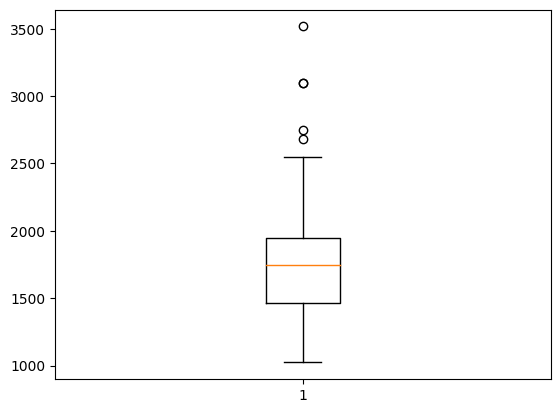

In [88]:
# A titulo de curiosidade, vamos ver um boxplot dos salarios
bplots = plt.boxplot(folha['Salario_Liquido'])

<h4> Agregando tabelas </h4>

In [89]:
# Apenas para garantirmos que estamos usando uma tabela nova e que nao vamos alterar resultados iniciais, vamos copiar a tabela de folha
agregado = folha

# Aqui um exemplo de como fazer um merge
agregado = agregado.merge(funcionarios, how="left", left_on = 'Matricula', right_on = 'MATRICULA')

# Repare que como ja haviamos agregado as informacoes de departamento na tabela de folha
# nao precisamos fazer isso novamente, basta usarmos a mesma tabela e o mesmo processo
# para adicionar as informacoes de departamento
agregado = agregado.merge(departamento, how="left", left_on = 'CODIGO_DEPARTAMENTO', right_on = 'ID')

# Agora temos um resultado que tem o conteudo das 3 tabelas
agregado.head()

,Matricula,Salario_Bruto,Desconto,Salario_Liquido,Cod_Dep,Data_Pag,Numero_Cheque,MATRICULA,NOME,SOBRENOME,...,CARGO,NIVEL_FORMACAO,SEXO,DATA_NASCIMENTO,SALARIO_ANUAL,BONUS,COMISSAO,ULTIMO_PAGAMENTO,ID,Depto
0,10,4395.83,879.17,3516.66,A00,2010-08-02,12346,10.0,CARMEN,BACARDI BOLIVAR,...,PRES,18.0,F,1952-08-09,52750.0,1000.0,4220.0,4395.83,A00,Head Office
1,20,3437.50,687.50,2750.00,B01,2010-08-03,12347,20.0,POILIN,BREATNACH,...,MANAGER,18.0,M,1967-01-28,41250.0,800.0,3300.0,3637.50,B01,Purchasing
2,30,3187.50,637.50,2550.00,C01,2010-08-04,12348,30.0,GREGORY,QUINLAN,...,MANAGER,20.0,F,1960-05-06,38250.0,800.0,3060.0,3187.50,C01,Marketing
3,50,3347.92,669.58,2678.34,E01,2010-08-05,12349,50.0,MARKUS,BOCKELKAMP,...,MANAGER,16.0,M,1944-09-10,40175.0,800.0,3214.0,3347.92,E01,Information Services
4,60,2687.50,537.50,2150.00,D11,2010-08-06,12350,60.0,SAVI,MADAN,...,MANAGER,16.0,M,1964-07-02,32250.0,600.0,2580.0,2687.50,D11,Design


In [90]:
agregado.columns

Index(['Matricula', 'Salario_Bruto', 'Desconto', 'Salario_Liquido', 'Cod_Dep',
       'Data_Pag', 'Numero_Cheque', 'MATRICULA', 'NOME', 'SOBRENOME',
       'ENDERECO', 'CIDADE', 'ESTADO', 'PAIS', 'CODIGO_PAIS',
       'CODIGO_DEPARTAMENTO', 'RAMAL', 'DATA_ADMISSAO', 'CARGO',
       'NIVEL_FORMACAO', 'SEXO', 'DATA_NASCIMENTO', 'SALARIO_ANUAL', 'BONUS',
       'COMISSAO', 'ULTIMO_PAGAMENTO', 'ID', 'Depto'],
      dtype='object')

<h3> Trabalhando em respostas e insights sugeridos </h3>

<h4> Existem funcionarios recebendo pagamentos dobrados? </h4>

Para responder essa pergunta vamos verificar se existem funcionarios com mais de uma data de pagamento cadastrada.<br>
Vale lembrar que aqui optamos por validar os dados de ano e mes, nao necessariamente o dia pois o que importa e a data de pagamento fechada.

In [91]:
# Primeiro criamos um campo calculado com o ano e mes
agregado['PGTO_ANO_MES'] = agregado['Data_Pag'].dt.to_period('M')
agregado.head(5)

,Matricula,Salario_Bruto,Desconto,Salario_Liquido,Cod_Dep,Data_Pag,Numero_Cheque,MATRICULA,NOME,SOBRENOME,...,NIVEL_FORMACAO,SEXO,DATA_NASCIMENTO,SALARIO_ANUAL,BONUS,COMISSAO,ULTIMO_PAGAMENTO,ID,Depto,PGTO_ANO_MES
0,10,4395.83,879.17,3516.66,A00,2010-08-02,12346,10.0,CARMEN,BACARDI BOLIVAR,...,18.0,F,1952-08-09,52750.0,1000.0,4220.0,4395.83,A00,Head Office,2010-08
1,20,3437.50,687.50,2750.00,B01,2010-08-03,12347,20.0,POILIN,BREATNACH,...,18.0,M,1967-01-28,41250.0,800.0,3300.0,3637.50,B01,Purchasing,2010-08
2,30,3187.50,637.50,2550.00,C01,2010-08-04,12348,30.0,GREGORY,QUINLAN,...,20.0,F,1960-05-06,38250.0,800.0,3060.0,3187.50,C01,Marketing,2010-08
3,50,3347.92,669.58,2678.34,E01,2010-08-05,12349,50.0,MARKUS,BOCKELKAMP,...,16.0,M,1944-09-10,40175.0,800.0,3214.0,3347.92,E01,Information Services,2010-08
4,60,2687.50,537.50,2150.00,D11,2010-08-06,12350,60.0,SAVI,MADAN,...,16.0,M,1964-07-02,32250.0,600.0,2580.0,2687.50,D11,Design,2010-08


In [92]:
# Como inicio dessa analise, precisamos entender quantos funcionarios temos cadastrados na lista de matriculas
qtd_funcionarios = agregado['Matricula'].nunique() # No dataframe agregado, a coluna Matricula, contando quantos unicos

# Tambem vamos armazenar quantos pagamentos estao registrados na nossa tabela
qtd_pagamentos = agregado.count()

In [93]:
# Agora usamos o group by para agrupar a tabela
agregado[['Matricula','Salario_Bruto']].groupby(by=['Matricula']).count()

,Salario_Bruto
Matricula,
10,1
20,1
30,1
50,1
60,1
70,1
100,1
108,1
109,1


In [94]:
# Vamos verificar pela matricula qual e a situacao dos registros
agregado.loc[(agregado['Matricula'] == 320)]

,Matricula,Salario_Bruto,Desconto,Salario_Liquido,Cod_Dep,Data_Pag,Numero_Cheque,MATRICULA,NOME,SOBRENOME,...,NIVEL_FORMACAO,SEXO,DATA_NASCIMENTO,SALARIO_ANUAL,BONUS,COMISSAO,ULTIMO_PAGAMENTO,ID,Depto,PGTO_ANO_MES
30,320,1662.5,332.5,1330.0,E21,2010-08-30,12376,320.0,OSCAR,BJERS,...,16.0,M,1951-08-07,19950.0,400.0,1596.0,1662.5,E21,Sales,2010-08
31,320,1662.5,332.5,1330.0,E83,2010-08-30,12377,320.0,OSCAR,BJERS,...,16.0,M,1951-08-07,19950.0,400.0,1596.0,1662.5,E21,Sales,2010-08


__Conclusão__: Aqui conseguimos ver claramente que um funcionario recebeu mais de um pagamento dentro da folha. Tudo indica que temos um registro que está duplicado, ainda mais pelo fato do numero do cheque ser diferente nas duas linhas, vamos reportar para a supervisão com um resultado salvo.

In [95]:
# Para salvarmos a evidencia e um report a parte, vamos guardar o resultado em um novo dataframe
pgto_duplicado = agregado.loc[(agregado['Matricula'] == 320)]
pgto_duplicado[['Matricula','Salario_Bruto','Desconto','Salario_Liquido','Cod_Dep','Data_Pag','Numero_Cheque']].head()

,Matricula,Salario_Bruto,Desconto,Salario_Liquido,Cod_Dep,Data_Pag,Numero_Cheque
30,320,1662.5,332.5,1330.0,E21,2010-08-30,12376
31,320,1662.5,332.5,1330.0,E83,2010-08-30,12377


<h4>Qual é a média de pagamentos por departamento?</h4>

Trabalhando no segundo insight sugerido, vamos tentar entender as estatisticas descritivas de cada um dos departamentos da empresa.

__nota__: Para que possamos trabalhar com tranquilidade e não atrapalhar nenhuma analise estatistica, vamos remover dados duplicados.

In [96]:
# Removendo duplicidades
agregado = agregado.drop_duplicates(subset=['Matricula'])

# Tinhamos 44 linhas, se removermos uma duplicada, devemos ter 43
len(agregado)

43

In [97]:
# Vamos entender as estatisitcas de cada um dos departamentos por salario liquido e bruto
estatisticas_salliq = agregado[['Cod_Dep','Salario_Liquido']].groupby(by=['Cod_Dep']).describe()
estatisticas_salbru = agregado[['Cod_Dep','Salario_Bruto']].groupby(by=['Cod_Dep']).describe()

In [98]:
# Aqui precisamos fazer uma modificação para que os dados sejam apresentaveis
estatisticas_salliq.columns = estatisticas_salliq.columns.droplevel(0)
estatisticas_salbru.columns = estatisticas_salbru.columns.droplevel(0)

In [99]:
estatisticas_salliq

,count,mean,std,min,25%,50%,75%,max
Cod_Dep,,,,,,,,
A00,5.0,2723.332000,726.156258,1950.00,1950.00,3100.00,3100.000,3516.66
B01,1.0,2750.000000,NaN,2750.00,2750.00,2750.00,2750.000,2750.00
C01,4.0,1981.495000,405.862557,1586.66,1817.66,1894.66,2058.495,2550.00
D11,11.0,1676.489091,293.576336,1218.00,1453.00,1645.34,1919.340,2150.00
D21,7.0,1711.240000,436.715485,1150.00,1378.66,1825.34,1917.340,2411.34
E01,1.0,2678.340000,NaN,2678.34,2678.34,2678.34,2678.340,2678.34
E11,6.0,1304.333333,349.460832,1022.66,1060.00,1121.67,1608.335,1750.00
E21,8.0,1640.172500,140.682871,1330.00,1589.34,1691.34,1743.340,1743.34


In [100]:
estatisticas_salbru

,count,mean,std,min,25%,50%,75%,max
Cod_Dep,,,,,,,,
A00,5.0,3404.166000,907.696688,2437.50,2437.50,3875.000,3875.0000,4395.83
B01,1.0,3437.500000,NaN,3437.50,3437.50,3437.500,3437.5000,3437.50
C01,4.0,2476.872500,507.325862,1983.33,2272.08,2368.330,2573.1225,3187.50
D11,11.0,2095.608182,366.969581,1522.50,1816.25,2056.670,2399.1700,2687.50
D21,7.0,2139.048571,545.890747,1437.50,1723.33,2281.670,2396.6700,3014.17
E01,1.0,3347.920000,NaN,3347.92,3347.92,3347.920,3347.9200,3347.92
E11,6.0,1630.416667,436.825580,1278.33,1325.00,1402.085,2010.4175,2187.50
E21,8.0,2050.211250,175.852014,1662.50,1986.67,2114.170,2179.1700,2179.17


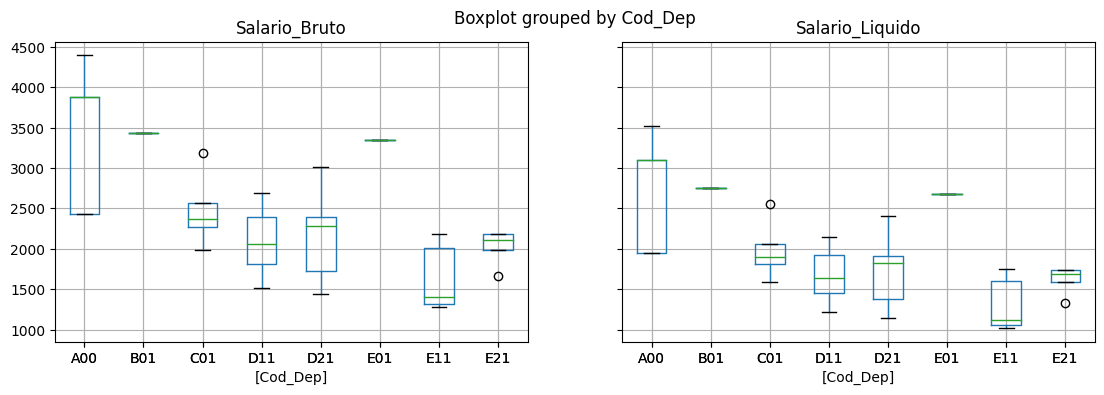

In [101]:
# Aqui tentamos usar um pouco da biblioteca de graficos embutida do pandas para usar um boxplot
from matplotlib import pyplot as plt # Biblioteca para utilizar graficos

agregado[['Cod_Dep','Salario_Liquido','Salario_Bruto']].boxplot(by='Cod_Dep', figsize=[13,4]) # Criando o grafico

plt.savefig('Resultados\\03_04_Boxplot_dptos.jpg', format='jpg') # Salvando o resultado

__Conclusões__: Aqui podemos ver agluns comportamentos interessantes.
* Os departamentos B01 e E01 não possuem valores em seu desvio padrão, isso só pode dizer duas coisas, ou temos um pagamento completamente uniforme na planilha que analisamos, ou só existe um funcionário dentro do departamento. A segunda hipótese se mostra verdade e é corroborada pelo fato do comportamento acontecer com salarios liquidos e brutos;
* Existe uma amplitudo enorme de salários em alguns departamentos. O D12 tem uma diferença enorme, onde o menor salário é menos da metade do maior;
* Mesmo tirando os departamentos onde temos apenas um funcionário, os quartis (25%, 50% e 75%) não necessariamente possuem qualquer ordem de grandeza que se justifique. O departamento A00 é muito maior que o E21 no seu quartil de 75%;
<br>

Ainda, através do boxplot, podemos verificar que:
* A amplitude de salários é maior no departamento A00;
* Os departamentos C01 e E21 são os unicos com pagamentos outliers (para cima e para baixo respectivamente);
* O departamento A00 tem uma mediana bem alta;
<br>

Outras conclusões interessantes:
* O departamento A00 é o departamento que melhor paga os seus funcionários;
* O departamento E11 é o que menos paga os seus funcionários, o maior salário no departamento E11 não chega no menor do A00;
* A mediana de salários dentro dos departamentos C01, D11, D21 e E21 é relativamente próxima;
* Apesar de estamos falando de colunas diferentes, é importante reparar que o comportamento de distrubuição das colunas de salário bruto e liquido são muito parecidos, o que faz sentido;
    * Caso não fizesse, poderia indicar algum indicio de fraude dentro dos pagamentos de uma empresa, afinal os salários brutos e liquidos precisam ser comparáveis;

<h4> Existem funcionários que receberam pagamento mas não estão cadastrados como funcionários? </h4>

Apesar de já termos feito a analise de nulos, agora vamos fazer com a tabela agregada como um todo.

In [102]:
agregado.isnull().sum()

Matricula               0
Salario_Bruto           0
Desconto                0
Salario_Liquido         0
Cod_Dep                 0
Data_Pag                0
Numero_Cheque           0
MATRICULA               2
NOME                    3
SOBRENOME               2
ENDERECO                2
CIDADE                  2
ESTADO                 17
PAIS                   21
CODIGO_PAIS             2
CODIGO_DEPARTAMENTO     2
RAMAL                   2
DATA_ADMISSAO           2
CARGO                   2
NIVEL_FORMACAO          2
SEXO                    2
DATA_NASCIMENTO         2
SALARIO_ANUAL           2
BONUS                   2
COMISSAO                2
ULTIMO_PAGAMENTO        2
ID                      2
Depto                   2
PGTO_ANO_MES            0
dtype: int64

Aqui podemos ver que existem dados nulos sim, e o que pode ter acontecido é que quando fizemos o merge (join) das tabelas, encontramos registros que tinham pares e provávelmente alguns outros que não.<br>
O que tudo indica é que existem 2 registros na tabela de folha que não existem na de funcionários.<br>
__Lembrando que...__ O campo Matricula, veio da tabela folha, enquanto o campo MATRICULA em caixa alta veio da tabela de funcionarios

In [103]:
# Verificando registros que tem o campo MATRICULA (caixa alta) em branco
agregado.loc[(agregado['MATRICULA'].isnull())]

,Matricula,Salario_Bruto,Desconto,Salario_Liquido,Cod_Dep,Data_Pag,Numero_Cheque,MATRICULA,NOME,SOBRENOME,...,NIVEL_FORMACAO,SEXO,DATA_NASCIMENTO,SALARIO_ANUAL,BONUS,COMISSAO,ULTIMO_PAGAMENTO,ID,Depto,PGTO_ANO_MES
7,108,2179.17,435.83,1743.34,E21,2010-08-09,12353,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2010-08
8,109,2179.17,435.83,1743.34,E21,2010-08-10,12354,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2010-08


Podemos ver que os funcionarios com a matricula 108 e 109 receberam pagamentos no mês 8, mas não estão cadastrados na tabela de funcionários.<br>
Para ter certeza vamos verificar o que está acontecendo.

In [104]:
funcionarios.loc[(funcionarios['MATRICULA'] == 108)]

,MATRICULA,NOME,SOBRENOME,ENDERECO,CIDADE,ESTADO,PAIS,CODIGO_PAIS,CODIGO_DEPARTAMENTO,RAMAL,DATA_ADMISSAO,CARGO,NIVEL_FORMACAO,SEXO,DATA_NASCIMENTO,SALARIO_ANUAL,BONUS,COMISSAO,ULTIMO_PAGAMENTO


In [105]:
funcionarios.loc[(funcionarios['MATRICULA'] == 109)]

,MATRICULA,NOME,SOBRENOME,ENDERECO,CIDADE,ESTADO,PAIS,CODIGO_PAIS,CODIGO_DEPARTAMENTO,RAMAL,DATA_ADMISSAO,CARGO,NIVEL_FORMACAO,SEXO,DATA_NASCIMENTO,SALARIO_ANUAL,BONUS,COMISSAO,ULTIMO_PAGAMENTO


In [117]:
# Salvando resultado para evidencias
pgto_nao_cadastrado = agregado.loc[(agregado['MATRICULA'].isnull())]

__Conclusão__: Podemos concluir que __sim__, existem funcionários que não estão cadastrados e receberam pagamento. É importante notar que esses funcionários são do departamento E21 __e__ possuem exatamente o mesmo salário.

<h4> Existem funcionários que não receberam pagamento? </h4>

Aqui, de forma mais pragmática, vamos procurar funcionários da tabela cadastrados na base de funcionários que não possuem valores recebidos na tabela agregada.<br>
__Lembrando que...__ O campo Matricula, veio da tabela folha, enquanto o campo MATRICULA em caixa alta veio da tabela de funcionarios

In [106]:
funcionarios_pagos = funcionarios.merge(folha, how="left", left_on = 'MATRICULA', right_on = 'Matricula')

In [107]:
# Agora vamos testar se existem valores nulos
funcionarios_pagos.isnull().sum()

MATRICULA               0
NOME                    1
SOBRENOME               0
ENDERECO                0
CIDADE                  0
ESTADO                 17
PAIS                   21
CODIGO_PAIS             0
CODIGO_DEPARTAMENTO     0
RAMAL                   0
DATA_ADMISSAO           0
CARGO                   0
NIVEL_FORMACAO          0
SEXO                    0
DATA_NASCIMENTO         0
SALARIO_ANUAL           0
BONUS                   0
COMISSAO                0
ULTIMO_PAGAMENTO        0
Matricula               1
Salario_Bruto           1
Desconto                1
Salario_Liquido         1
Cod_Dep                 1
Data_Pag                1
Numero_Cheque           1
dtype: int64

Podemos ver que aparentemente um funcionario cadastrado não foi pago, uma vez que a coluna Matricula tem um numero nulo, vejamos:

In [108]:
funcionarios_pagos.loc[(funcionarios_pagos['Matricula'].isnull())]

,MATRICULA,NOME,SOBRENOME,ENDERECO,CIDADE,ESTADO,PAIS,CODIGO_PAIS,CODIGO_DEPARTAMENTO,RAMAL,...,BONUS,COMISSAO,ULTIMO_PAGAMENTO,Matricula,Salario_Bruto,Desconto,Salario_Liquido,Cod_Dep,Data_Pag,Numero_Cheque
6,90,STEFANO,MELONI,"11, VIA CORTE D'APPELLO",PISTOIA,NaN,NaN,IT,E11,5498,...,600,2380,2479.17,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [115]:
# Guardando resultados para o relatorio final
funcionarios_nao_pagos = funcionarios_pagos.loc[(funcionarios_pagos['Matricula'].isnull())]

__Conclusão__: O funcionários _STEFANO_, da cidade de _PISTOIA_ não recebeu pagamento no mês 8. Precisamos reportar isso no nosso relatório final

<h4> Quais são os gastos mensais da empresa? </h4>

Uma vez que já agregamos todas tabelas, fica mais fácil de conseguir calcular esse tipo de informação.<br>
__Lembrando que...__ Já removemos duplicatas no dataset _agregado_

In [109]:
# Gasto geral
agregado[['Salario_Bruto','Salario_Liquido']].sum()

Salario_Bruto      97922.96
Salario_Liquido    78338.42
dtype: float64

__Conclusão__: Aqui temos uma informação simples de ser obtida e que pode ser de muita ajuda para o nosso relatório final

<h4> Outros dados que poderiamos explorar </h4>

Nesse notebook acabamos não fazendo nenhuma exploração em dados adjacentes, mas ainda temos outras colunas bem interessantes que podem nos trazer muitas informações interessantes. Por exemplo o Cargo, Pais e Sexo;

In [110]:
agregado[['CARGO','Salario_Bruto']].groupby(by=['CARGO']).describe()

Salario_Bruto                                                         \
                 count         mean         std      min        25%       50%   
CARGO                                                                           
ANALYST            3.0  2239.996667  222.279854  1983.33  2175.8300  2368.330   
CLERK              8.0  2104.271250  412.416839  1437.50  1785.8300  2339.170   
DESIGNER          10.0  2036.419000  326.819219  1522.50  1797.2900  2056.670   
FIELDREP           5.0  1972.836000  184.825452  1662.50  1986.6700  1986.670   
MANAGER            6.0  2975.626667  472.369643  2179.17  2769.1675  3100.835   
OPERATOR           6.0  1630.416667  436.825580  1278.33  1325.0000  1402.085   
PRES               1.0  4395.830000         NaN  4395.83  4395.8300  4395.830   
SALESREP           2.0  3875.000000    0.000000  3875.00  3875.0000  3875.000   

                              
                75%      max  
CARGO                         
ANALYST   2368.3300  2368.33  
CLERK     2406.8775  2437.50  
DESIGNER  2260.4200  2486.67  
FIELDREP  2114.1700  2114.17  
MANAGER   3307.8150  3437.50  
OPERATOR  2010.4175  2187.50  
PRES      4395.8300  4395.83  
SALESREP  3875.0000  3875.00

In [111]:
agregado[['CARGO','BONUS']].groupby(by=['CARGO']).describe()

BONUS                                                           \
         count         mean         std     min     25%     50%     75%   
CARGO                                                                     
ANALYST    3.0   566.666667   57.735027   500.0   550.0   600.0   600.0   
CLERK      8.0   500.000000  119.522861   300.0   400.0   550.0   600.0   
DESIGNER  10.0   500.000000   81.649658   400.0   425.0   500.0   575.0   
FIELDREP   5.0   480.000000   44.721360   400.0   500.0   500.0   500.0   
MANAGER    6.0   700.000000  126.491106   500.0   625.0   750.0   800.0   
OPERATOR   6.0   383.333333   98.319208   300.0   300.0   350.0   475.0   
PRES       1.0  1000.000000         NaN  1000.0  1000.0  1000.0  1000.0   
SALESREP   2.0   950.000000   70.710678   900.0   925.0   950.0   975.0   

                  
             max  
CARGO             
ANALYST    600.0  
CLERK      600.0  
DESIGNER   600.0  
FIELDREP   500.0  
MANAGER    800.0  
OPERATOR   500.0  
PRES      1000.0  
SALESREP  1000.0

In [112]:
agregado[['PAIS','Salario_Bruto']].groupby(by=['PAIS']).describe()

Salario_Bruto                                              \
                      count         mean         std      min       25%   
PAIS                                                                      
GREAT BRITAIN           9.0  2221.853333  344.306435  1479.17  2114.170   
SWITZERLAND             1.0  1848.330000         NaN  1848.33  1848.330   
UNITED STATES          12.0  2433.126667  660.628636  1522.50  2112.295   

                                           
                   50%       75%      max  
PAIS                                       
GREAT BRITAIN  2187.50  2437.500  2687.50  
SWITZERLAND    1848.33  1848.330  1848.33  
UNITED STATES  2354.17  2618.545  3875.00

In [113]:
agregado[['SEXO','Salario_Bruto']].groupby(by=['SEXO']).describe()

Salario_Bruto                                                      \
             count        mean         std      min      25%       50%   
SEXO                                                                     
F             18.0  2369.81500  820.281148  1325.00  1886.46  2234.585   
M             23.0  2213.38913  642.723360  1278.33  1776.25  2106.670   

                         
           75%      max  
SEXO                     
F     2486.670  4395.83  
M     2417.085  3875.00

__Conclusão__: Nessa rápida analise podemos concluior que:
* Nossa empresa emprega mais DESIGNERs do que qualquer outro cargo;
* A média de salário dos DESIGNERs é a menor de todoas dentro da empresa;
* Só temos um funcionário que mora em SWITZERLAND e o seu salário é menor que a média do menor cargo da empresa;
* Na nossa analise, podemos constatar que empregamos mais homens do que mulheres, embora as mulheres ganhem mais em todos os quadrantes analisados;
* Funcionarios residentes de UNITED STATES, ganham melhor;
* Os representantes de venda (SALESREP), tem um salário alto em relação ao resto da empresa, e ganham exatamente a mesma coisa;

<h2> Apresentacao </h2>

<h3> Arquivos evidencia </h3>

Legenda para cada um dos arquivos evidência:
* 03_01_pgto_duplicado.csv = Lista de pagamentos duplicados encontrados na folha;
* 03_02_estatisticas_salliq.csv = Estatisticas de salario liquido por departamento;
* 03_03_estatisticas_salbru.csv = Estatisticas de salario bruto por departamento;
* 03_04_Boxplot_dptos.jpg = Imagem com os boxplots de salario por departamento;
* 03_05_funcionarios_nao_pagos.csv = Lista com funcionarios que nao foram pagos;
* 03_06_pgto_nao_cadastrado.csv = Lista de funcionarios que foram pagos mas nao estao cadastrados;

In [118]:
# Exportando os arquivos
pgto_duplicado.to_csv("Resultados\\03_01_pgto_duplicado.csv")
estatisticas_salliq.to_csv("Resultados\\03_02_estatisticas_salliq.csv")
estatisticas_salbru.to_csv("Resultados\\03_03_estatisticas_salbru.csv")
funcionarios_nao_pagos.to_csv("Resultados\\03_05_funcionarios_nao_pagos.csv")
pgto_nao_cadastrado.to_csv("Resultados\\03_06_pgto_nao_cadastrado.csv")

<h3> Descrição </h3>

<h4> Sobre o relatório </h4>

Esse relatório foi feito;
* Data de inicio da analise: dd/mm/yyyy;
* Data de finalização da analise: dd/mm/yyyy;
* Feito com: Conda via jupyter notebook;
* Motivação: Entender a estrutura da folha de pagamento e audita-la;
* Feito por: Marcelo Mastrangi Bracali

Sobre os funcionarios:
* Foram encontrados 42 funcionarios cadastrados;
    * Embora tenhamos encontrados 44 pagamentos para o mês 8;
* 1 funcionario recebeu pagamento sem estar cadastrado;
    * Evidencia 03_06_pgto_nao_cadastrado.csv
* 1 funcionario não recebeu pagamento;
    * Evidencia 03_05_funcionarios_nao_pagos.csv
* 1 funcionario recebeu pagamentos duplicados;
    * Evidencia 03_01_pgto_duplicado.csv

Sobre os gastos da empresa
* Encontramos uma série de informações interessantes sobre os gastos da empresa, os resultados foram divididos pelos salarios brutos e liquidos e podem ser encontrados na pasta de evidencias;